# Exercise 0
Already completed in exercise statement

<Figure size 640x480 with 0 Axes>

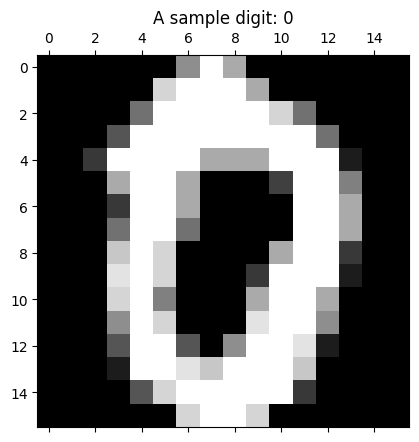

<Figure size 640x480 with 0 Axes>

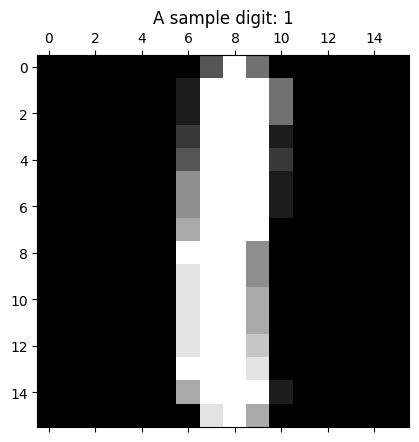

c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


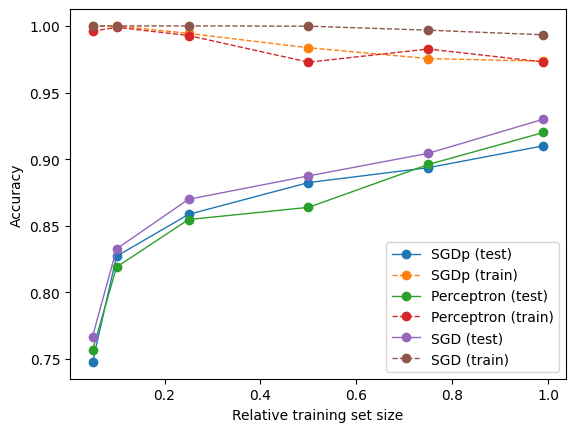

In [5]:
# Initial script
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
@author: 

Example mostly taken from scikit-learn    
"""

from time import time

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.neural_network import MLPClassifier

def get_digit(X,i,dim=8):
    dig = X[i].reshape(dim,dim)
    if dim == 16: dig = dig.T
    return dig

def show_digit(X,i,dim=8):
    """ Auxiliary function to show a digit """
    plt.gray()
    plt.matshow(get_digit(X,i,dim))
    plt.title("A sample digit: "+str(y[i]))
    plt.show()


#%% Load a dataset and plot some samples
d = 16 # choose between using 8x8 or 16x16 digits.
if d == 8:
    digits = datasets.load_digits()
    X, y = digits.data/16, digits.target
else:
    mat = loadmat('mnist16.mat', squeeze_me=True, struct_as_record=False)
    X, y = mat['A'].data/144, mat['A'].nlab - 1


show_digit(X,13,dim=d)
show_digit(X,280,dim=d)


# Plot images of the digits
n_img_per_row = 10
h = d+2 # height/width of each digit 
img = np.zeros(( h * n_img_per_row , h * n_img_per_row ))
for i in range(n_img_per_row):
    ix = h * i + 1
    for j in range(n_img_per_row):
        iy = h * j + 1
        k = np.random.randint(len(X))
        img[ix:ix + d, iy:iy + d] = get_digit(X,k,dim=d)
"""
plt.imshow(img, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')
plt.show()
"""

#%%
# Create a list of classifiers
# To add a classifier ad a tuple to the list 'classifiers'.
# The tuple must be of the form:
# ( "NAME" , lw , clf )
# where "NAME" is the name you want to appear in the plots, lw is
# the line width for the plots and clf is the classifier itself, a
# scikit-lear object.

classifiers = [
    ("SGDp",1, SGDClassifier(loss='perceptron', eta0=1, learning_rate='constant', penalty=None)),
    ("Perceptron", 1,Perceptron(tol=1e-5,max_iter=100,eta0=1)),
    ("SGD",1, SGDClassifier(loss='squared_hinge', penalty=None))
]


#%% ---------------------------------------
## Exercise 0
###########################################

heldout = [0.95, 0.9,0.75, 0.50, 0.25, 0.01] # Ratio of samples left out from training, for error estimation
rounds = 5 # Number of repetitions to compute average error


xx = 1. - np.array(heldout)
seed = np.random.randint(100)

for name, lws, clf in classifiers:
    #print("\n   Training %s" % name)
    rng = np.random.RandomState(seed)  #to have the same for all classifiers
    yyTr = []
    yyTs = []
    
    for i in heldout:
        tr_time = 0
    
        ssumTr = 0
        ssumTs = 0
        for r in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=rng)

            t_ini = time()
            clf.fit(X_train, y_train)
            tr_time += time() - t_ini

            y_pred = clf.predict(X_test)

            ssumTr += clf.score(X_train,y_train)
            ssumTs += clf.score(X_test,y_test)

        yyTr.append(ssumTr/rounds)
        yyTs.append(ssumTs/rounds)

        #print("Average training time after {} rounds: {}".format(rounds,tr_time/rounds))
        #print("average accuracy: {}".format(yyTs[-1]))
    
    plt.plot(xx, yyTs, '-o',lw=lws ,label=name+' (test)')
    plt.plot(xx, yyTr, '--o',lw=lws, label=name+' (train)')

plt.legend(loc="lower right")
plt.xlabel("Relative training set size")
plt.ylabel("Accuracy")
plt.show()

Como vamos a utilizar el m'etodo MLP voy a tomar como referencia los resultados de Perctron (train) y (test) y me voy a decantar por hacer una partici'on 80$ train y 20% test

# Exercise 1: Single Hidden Layer MLP


In [27]:
# Vamos a asumir que la ejecuci'on es secuencial por lo que X e y est'an definidos y no necesitamos repetir imports
from sklearn.metrics import accuracy_score
# Aqui vamos a declarar todos los par'ametros variables para el MLP
trainSize = 0.8
testSize = 1. - trainSize
neuron_range = range(5,21)
average_accuracy = []
training_times = []

# Separamos el dataset en entrenamiento y testo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=42)

# Inicializamos el MLP con la primera iteracion de  neuronas de la capa oculta
mlp = MLPClassifier(hidden_layer_sizes=(5), max_iter=130, alpha=1e-4, solver='sgd', tol=1e-4, 
                    random_state=1, learning_rate_init=.1) # Si molesta mucho eliminamos el verbose

# Procedemos al bucle principal del ejercicio 1
for neurons in neuron_range:
    mlp.set_params(hidden_layer_sizes=(neurons)) # Setteamos el numero de neuronas de la capa oculata
    start_time = time () # 
    mlp.fit(X_train, y_train) # Entrenamos el modelo
    end_time = time () # 
    training_time = end_time - start_time # Calculamos el tiempo de entrenamiento
    # 
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #
    average_accuracy.append(accuracy)
    training_times.append(training_time)
    #
    print(f"N'umero de neuronas: {neurons} || Accuracy: {accuracy} ||  Training Time: {training_time}\n")
    
# Vamos a mostrar las medias
avg_accuracy = sum(average_accuracy) / len(average_accuracy) 
avg_training_time = sum(training_times) / len(training_times)

print(f'\n\nAverage Accuracy: {avg_accuracy}')
print(f'Average Training Time: {avg_training_time}')


c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 5 || Accuracy: 0.86 ||  Training Time: 0.45816516876220703



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 6 || Accuracy: 0.8475 ||  Training Time: 0.47430968284606934



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 7 || Accuracy: 0.8775 ||  Training Time: 0.4731762409210205



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 8 || Accuracy: 0.875 ||  Training Time: 0.47672462463378906

N'umero de neuronas: 9 || Accuracy: 0.9075 ||  Training Time: 0.48968935012817383



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 10 || Accuracy: 0.915 ||  Training Time: 0.47812962532043457



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 11 || Accuracy: 0.925 ||  Training Time: 0.4982421398162842

N'umero de neuronas: 12 || Accuracy: 0.9375 ||  Training Time: 0.44879961013793945



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 13 || Accuracy: 0.9275 ||  Training Time: 0.5136270523071289



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 14 || Accuracy: 0.915 ||  Training Time: 0.5123553276062012

N'umero de neuronas: 15 || Accuracy: 0.91 ||  Training Time: 0.4224050045013428

N'umero de neuronas: 16 || Accuracy: 0.925 ||  Training Time: 0.4424889087677002

N'umero de neuronas: 17 || Accuracy: 0.93 ||  Training Time: 0.4380953311920166

N'umero de neuronas: 18 || Accuracy: 0.9225 ||  Training Time: 0.4328420162200928

N'umero de neuronas: 19 || Accuracy: 0.915 ||  Training Time: 0.49138951301574707

N'umero de neuronas: 20 || Accuracy: 0.9375 ||  Training Time: 0.4321632385253906



Average Accuracy: 0.90796875
Average Training Time: 0.46766267716884613


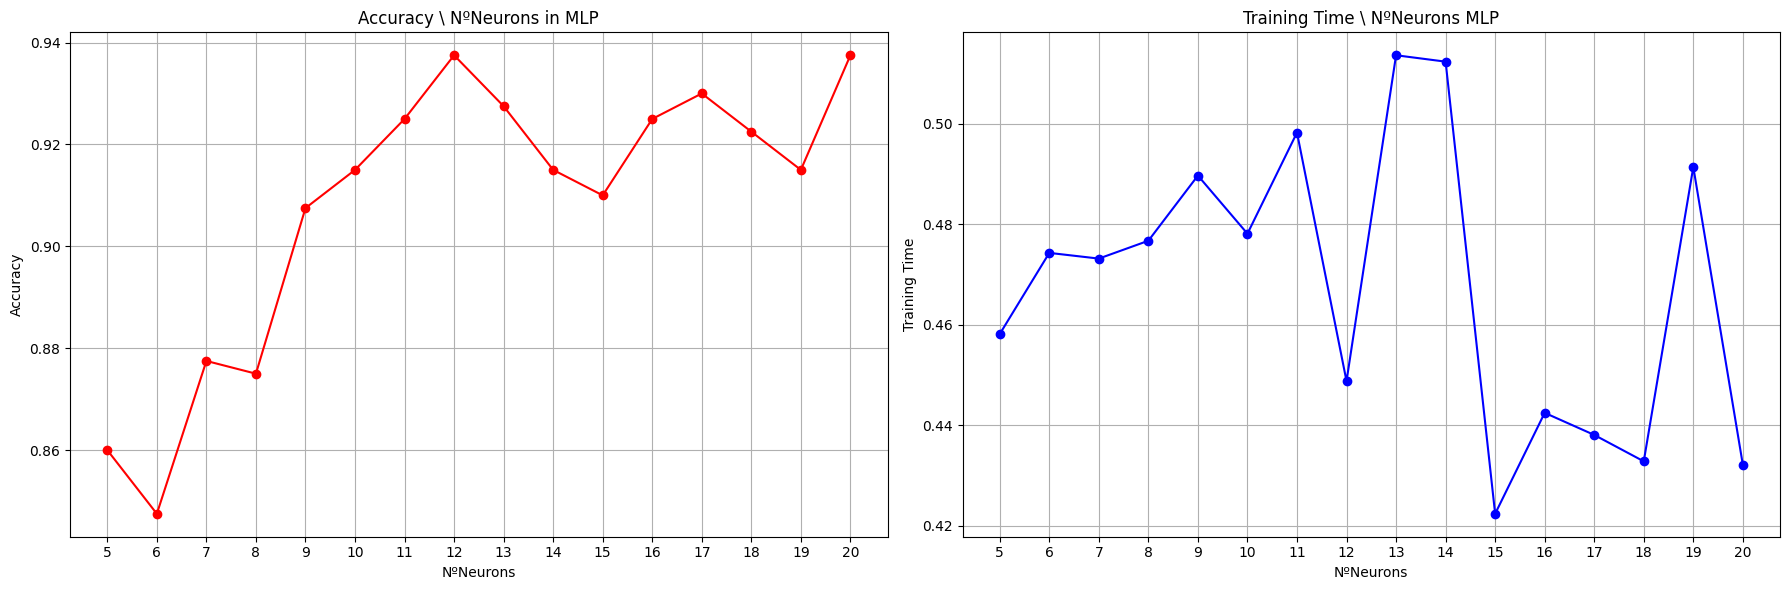

In [30]:
# Una vez hechos hechos los entrenamientos para poder manejar los resultados y gr'aficas vamos a hacer los plots en una celda siguiente al entrenamiento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gr'afica para la accuracy
ax1.plot(neuron_range, average_accuracy, marker='o', linestyle='-',c='red')
ax1.set_title('Accuracy \ NºNeurons in MLP')
ax1.set_xlabel('NºNeurons')
ax1.set_ylabel('Accuracy')
ax1.set_xticks(neuron_range)
ax1.grid(True)

# Gr'afica para el tiempo de entrenamiento
ax2.plot(neuron_range, training_times, marker='o', linestyle='-', c='blue')
ax2.set_title('Training Time \ NºNeurons MLP')
ax2.set_xlabel('NºNeurons')
ax2.set_ylabel('Training Time')
ax2.set_xticks(neuron_range)
ax2.grid(True)

plt.tight_layout()
plt.show()


### Discusion 


# Exercise 2

In [31]:
# Vamos a asumir que la ejecuci'on es secuencial por lo que X e y est'an definidos y no necesitamos repetir imports
from sklearn.metrics import accuracy_score
# Aqui vamos a declarar todos los par'ametros variables para el MLP
trainSize = 0.8
testSize = 1. - trainSize
neuron_range = range(5,21)
average_accuracy = []
training_times = []

# Separamos el dataset en entrenamiento y testo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=42)

# Inicializamos el MLP con la primera iteracion de  neuronas de la capa oculta
mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=130, alpha=1e-4, solver='sgd', tol=1e-4, 
                    random_state=1, learning_rate_init=.1) # Si molesta mucho eliminamos el verbose

# Procedemos al bucle principal del ejercicio 1
for neurons in neuron_range:
    mlp.set_params(hidden_layer_sizes=(neurons,neurons)) # Setteamos el numero de neuronas de la capa oculata
    start_time = time () # 
    mlp.fit(X_train, y_train) # Entrenamos el modelo
    end_time = time () # 
    training_time = end_time - start_time # Calculamos el tiempo de entrenamiento
    # 
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #
    average_accuracy.append(accuracy)
    training_times.append(training_time)
    #
    print(f"N'umero de neuronas: {neurons} || Accuracy: {accuracy} ||  Training Time: {training_time}\n")
    
# Vamos a mostrar las medias
avg_accuracy = sum(average_accuracy) / len(average_accuracy) 
avg_training_time = sum(training_times) / len(training_times)

print(f'\n\nAverage Accuracy: {avg_accuracy}')
print(f'Average Training Time: {avg_training_time}')


N'umero de neuronas: 5 || Accuracy: 0.72 ||  Training Time: 0.1555802822113037



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 6 || Accuracy: 0.865 ||  Training Time: 0.549083948135376



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 7 || Accuracy: 0.8725 ||  Training Time: 0.5820815563201904



c:\Users\ALEX-WINDOWS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


N'umero de neuronas: 8 || Accuracy: 0.9125 ||  Training Time: 0.5497465133666992

N'umero de neuronas: 9 || Accuracy: 0.9125 ||  Training Time: 0.37976527214050293

N'umero de neuronas: 10 || Accuracy: 0.9025 ||  Training Time: 0.5445432662963867

N'umero de neuronas: 11 || Accuracy: 0.9125 ||  Training Time: 0.5820896625518799

N'umero de neuronas: 12 || Accuracy: 0.8875 ||  Training Time: 0.5375604629516602

N'umero de neuronas: 13 || Accuracy: 0.9325 ||  Training Time: 0.38952016830444336

N'umero de neuronas: 14 || Accuracy: 0.95 ||  Training Time: 0.37428927421569824

N'umero de neuronas: 15 || Accuracy: 0.92 ||  Training Time: 0.37162160873413086

N'umero de neuronas: 16 || Accuracy: 0.9375 ||  Training Time: 0.38658905029296875

N'umero de neuronas: 17 || Accuracy: 0.94 ||  Training Time: 0.42465925216674805

N'umero de neuronas: 18 || Accuracy: 0.9325 ||  Training Time: 0.33011674880981445

N'umero de neuronas: 19 || Accuracy: 0.9525 ||  Training Time: 0.3442413806915283

N'ume

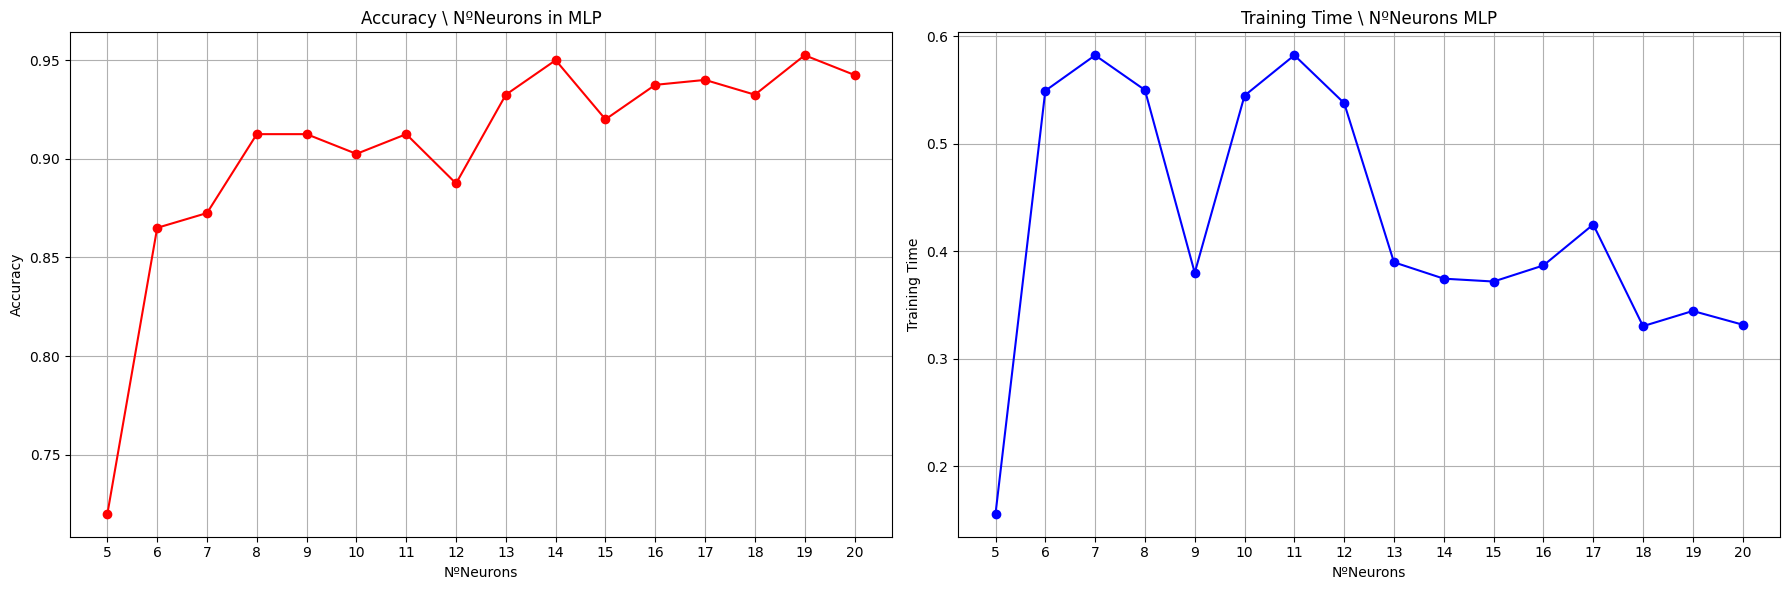

In [32]:
# Una vez hechos hechos los entrenamientos para poder manejar los resultados y gr'aficas vamos a hacer los plots en una celda siguiente al entrenamiento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gr'afica para la accuracy
ax1.plot(neuron_range, average_accuracy, marker='o', linestyle='-',c='red')
ax1.set_title('Accuracy \ NºNeurons in MLP')
ax1.set_xlabel('NºNeurons')
ax1.set_ylabel('Accuracy')
ax1.set_xticks(neuron_range)
ax1.grid(True)

# Gr'afica para el tiempo de entrenamiento
ax2.plot(neuron_range, training_times, marker='o', linestyle='-', c='blue')
ax2.set_title('Training Time \ NºNeurons MLP')
ax2.set_xlabel('NºNeurons')
ax2.set_ylabel('Training Time')
ax2.set_xticks(neuron_range)
ax2.grid(True)

plt.tight_layout()
plt.show()
